# ANN for hand gesture recognition

In [ ]:
# This jupyter notebook allows to load the data from the "data" folder. 
# To neural network are then trained on this data and the performances
# of these models are shown in the comparison section.
# The models can then be used in live in the last section.

# Requirements:
# !pip install keras
# !pip install tensorflow
# !pip install opencv-python

In [1]:
from image import Image

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, MaxPool2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.python.client import device_lib
import tensorflow as tf

from sklearn.model_selection import train_test_split

C:\Users\Florian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Load images and labels, split the train and test datasets

In [2]:
# load the training set of images with their number of finger( labels ) 
# each element of image is a 25*25 array of values between 0 and 255
images, labels = Image.load_images("data", flatten=True)


In [3]:
# shuffle the dataset (images and corresponding labels) and divide it in a train set (75% of dataset )and a test set (25% of dataset)
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, random_state=15, shuffle=True, test_size=.25)

#### Normalize the data and transform labels into categorical values

In [4]:
# normalizing the values by dividing the grayscale by 255 (the maximum value)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
# transform integers into array with 1 at index integer and zero at others
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


In [6]:
num_pixels = X_train.shape[1] # number of pixel on one image
num_classes = Y_test.shape[1] # number of possible fingers

#### Build the model

In [7]:
def ANN():
  # create model with 1 hidden layer
    model = Sequential()
    #Input and hidden layer
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.5))
    #Output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy']) 
    return model

In [8]:
def ANN_2():
  # create model with 2 hidden layer
    model = Sequential()
    #Input and hidden layer
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.5))
    #adding one more layer
    model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.5))
    #Output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy']) 
    return model

#### Train the model

In [9]:
# Training of the model with 1 hidden layer
# The model is fit over 10 epochs with updates every 200 images.

# build the model
model = ANN()

# Fit the model
#The test data is used as the validation dataset, allowing you to see the skill of the model as it trains.
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=200, verbose=2)


# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Final accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 4480 samples, validate on 1494 samples
Epoch 1/50
 - 7s - loss: 6.5861 - acc: 0.3069 - val_loss: 5.3483 - val_acc: 0.4552
Epoch 2/50
 - 8s - loss: 4.7659 - acc: 0.4676 - val_loss: 3.2348 - val_acc: 0.5783
Epoch 3/50
 - 6s - loss: 2.3997 - acc: 0.5661 - val_loss: 1.0295 - val_acc: 0.6714
Epoch 4/50
 - 6s - loss: 0.7727 - acc: 0.7241 - val_loss: 0.6282 - val_acc: 0.7932
Epoch 5/50
 - 6s - loss: 0.5246 - acc: 0.8270 - val_loss: 0.5279 - val_acc: 0.8360
Epoch 6/50
 - 6s - loss: 0.3972 - acc: 0.8721 - val_loss: 0.4568 - val_acc: 0.8487
Epoch 7/50
 - 6s - loss: 0.3123 - acc: 0.9029 - val_loss: 0.3946 - val_acc: 0.8715
Epoch 8/50
 - 6s - loss: 0.2560 - acc: 0.9239 - val_loss: 0.3492 - val_acc: 0.8909
Epoch 9/50
 - 6s - loss: 0.2022 - acc: 0.9453 - val_loss: 0.3325 - val_acc: 0.8909
Epoch 10/50
 - 6s - loss: 0.1731 - acc: 0.9536 - val_loss: 0.3127 - val_acc: 0.9003
Epoch 11/50
 - 6s - loss: 0.1407 - acc: 0.9641 - val_loss: 0.3030 - val_acc: 0.9009
Epoch 12/50
 - 6s - loss: 0.1267 - ac

In [10]:
# Training of the model with 2 hidden layers
# The model is fit over 10 epochs with updates every 200 images.

# build the model
model_2 = ANN_2()
# Fit the model
hist_2 = model_2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=200, verbose=2)
# The test data is used as the validation dataset, allowing you to see the skill of the model as it trains.

# Final evaluation of the model
scores = model_2.evaluate(X_test, Y_test, verbose=0)
print("Final accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 4480 samples, validate on 1494 samples
Epoch 1/50
 - 10s - loss: 1.8460 - acc: 0.2598 - val_loss: 1.5733 - val_acc: 0.3842
Epoch 2/50
 - 7s - loss: 1.5945 - acc: 0.3366 - val_loss: 1.4281 - val_acc: 0.4525
Epoch 3/50
 - 7s - loss: 1.4354 - acc: 0.4136 - val_loss: 1.2147 - val_acc: 0.5515
Epoch 4/50
 - 7s - loss: 1.2903 - acc: 0.4842 - val_loss: 1.0716 - val_acc: 0.6218
Epoch 5/50
 - 7s - loss: 1.1542 - acc: 0.5391 - val_loss: 0.9410 - val_acc: 0.6841
Epoch 6/50
 - 7s - loss: 1.0287 - acc: 0.5933 - val_loss: 0.8183 - val_acc: 0.7102
Epoch 7/50
 - 7s - loss: 0.9063 - acc: 0.6429 - val_loss: 0.7122 - val_acc: 0.7597
Epoch 8/50
 - 7s - loss: 0.8297 - acc: 0.6897 - val_loss: 0.6347 - val_acc: 0.7851
Epoch 9/50
 - 7s - loss: 0.7450 - acc: 0.7147 - val_loss: 0.5565 - val_acc: 0.8079
Epoch 10/50
 - 8s - loss: 0.6762 - acc: 0.7406 - val_loss: 0.5226 - val_acc: 0.8079
Epoch 11/50
 - 8s - loss: 0.5777 - acc: 0.7846 - val_loss: 0.4648 - val_acc: 0.8400
Epoch 12/50
 - 9s - loss: 0.5313 - a

#### Use the model for prediction on another dataset

In [11]:
# load data from a new dataset and use the fitted model to get the number of finger on each picture
X_val, Y_val = Image.load_images("data_test", flatten=True)

#prepare data
X_val = X_val.astype('float32') / 255
Y_val = np_utils.to_categorical(Y_val)

In [12]:
# compute predictions using our models
Y_predict = model.predict(X_val)
Y_predict_2 = model_2.predict(X_val)

In [13]:
# compute and display the accuracy of our models by comparing predicted and real values
accuracy = sum(Y_predict.argmax(axis=1) == Y_val.argmax(axis=1)) / Y_val.shape[0]
accuracy_2 = sum(Y_predict_2.argmax(axis=1) == Y_val.argmax(axis=1)) / Y_val.shape[0]
print("Accuracy with the 1st model : %.2f%%" % (accuracy*100))
print("Accuracy with the 2nd model : %.2f%%" % (accuracy_2*100))

Accuracy with the 1st model : 63.64%
Accuracy with the 2nd model : 61.29%


#### Comparison of the model with 1 and 2 hidden layers

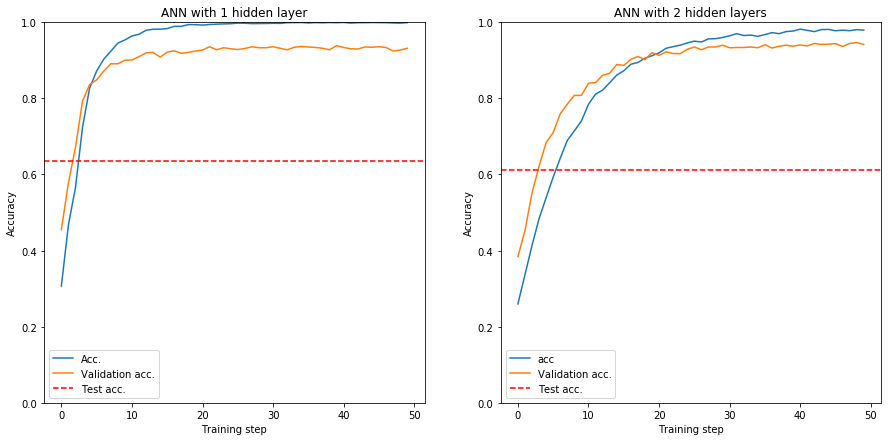

In [14]:
# Plot of the evolution of the accuracy 
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

#accuracy with model1

# accuracy improvements during training of the model
ax1.plot(hist.history['acc'], label='Acc.')
ax1.plot(hist.history['val_acc'], label='Validation acc.')

# accuracy of the predictions with an other dataset ( doesn't depend on the training step because the model is already trained)
ax1.axhline(accuracy, ls='--', c='r', label='Test acc.')

ax1.set_ylim([0,1])
ax1.set_xlabel('Training step')
ax1.set_ylabel('Accuracy')
ax1.set_title('ANN with 1 hidden layer')
ax1.legend()



#accuracy with model2

# accuracy improvements during training of the model
ax2.plot(hist_2.history['acc'], label='acc')
ax2.plot(hist_2.history['val_acc'], label='Validation acc.')

# accuracy of the predictions with an other dataset ( doesn't depend on the training step because the model is already trained)
ax2.axhline(accuracy_2, ls='--', c='r', label='Test acc.')


ax2.set_ylim([0,1])
ax2.set_xlabel('Training step')
ax2.set_ylabel('Accuracy')
ax2.set_title('ANN with 2 hidden layers')
ax2.legend()

plt.show()

We can see that we have a similar accuracy for both models. The loss of accuracy between the train and validation datasets and the test datasets can be explained by an overfitting of the model in both case. Th addition of dropouts in the models reduced this overfitting, but it could be improved by performing slightly variations (rotation, shifting, zoom…) on the original data thanks to method such as ImageDataGenerator() of the keras library.

#### Live test

At the end of the live press SPACE before exiting to be able to run the last line.

In [ ]:
# Test the model with one hidden layer in live. Stay still for the prediction.
# 
# Press B to select a background
# Press SPACE to return an image
# Press ESC to shut the window
# Press R or L to move the window to the left or right
# Press P or M to increase or decrease the size of the window

img = Image.captureImage(model)

In [ ]:
# Returned image
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()
print("Prediction :", model.predict(np.array([img.flatten()])).argmax())